In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
train_dir = r"E:\Cnn_ Brain_Tumor Dataset\Training"
test_dir = r"E:\Cnn_ Brain_Tumor Dataset\Testing"


In [3]:
#  preprocessing 
img_size = 224
batch_size = 32
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=15,zoom_range=0.1,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)


In [4]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),batch_size=batch_size,class_mode='categorical',shuffle=True)

Found 2870 images belonging to 4 classes.


In [5]:
from sklearn.utils.class_weight import compute_class_weight
# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)

class_weights = dict(enumerate(class_weights))
print("Class Weights:", class_weights)


Class Weights: {0: np.float64(0.8686440677966102), 1: np.float64(0.8728710462287105), 2: np.float64(1.8164556962025316), 3: np.float64(0.8675937122128174)}


In [6]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),batch_size=batch_size,class_mode='categorical',shuffle=False)

Found 394 images belonging to 4 classes.


In [7]:
#  model building 
base_model = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)


In [8]:
# Freeze pretrained layers
for layer in base_model.layers:
    layer.trainable = False

In [9]:
# Custom classifier head
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

In [10]:
#   model compilation
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [11]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 21,138,500 (80.64 MB)

 Trainable params: 6,423,812 (24.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [12]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)


In [13]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=test_generator,
    class_weight=class_weights,
    callbacks=[early_stop]
)


Epoch 1/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 2066s 23s/step - accuracy: 0.6533 - loss: 0.8411 - val_accuracy: 0.4645 - val_loss: 1.6018
Epoch 2/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1663s 18s/step - accuracy: 0.7732 - loss: 0.5646 - val_accuracy: 0.5558 - val_loss: 1.5695
Epoch 3/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1521s 16s/step - accuracy: 0.8143 - loss: 0.4703 - val_accuracy: 0.5736 - val_loss: 1.5048
Epoch 4/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1534s 17s/step - accuracy: 0.8251 - loss: 0.4247 - val_accuracy: 0.6117 - val_loss: 1.6121
Epoch 5/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1481s 16s/step - accuracy: 0.8432 - loss: 0.3858 - val_accuracy: 0.6091 - val_loss: 1.6311
Epoch 6/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1633s 18s/step - accuracy: 0.8547 - loss: 0.3523 - val_accuracy: 0.6802 - val_loss: 1.4845
Epoch 7/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1738s 19s/step - accuracy: 0.8655 - loss: 0.3385 - val_accuracy: 0.6624 - val_loss: 1.5358
Epoch 8/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1533s 17s/step - accuracy: 0.8690 - loss: 0.3165 - val_accu

In [14]:
loss, accuracy = model.evaluate(test_generator)
print("Test Accuracy:", accuracy)

13/13 ━━━━━━━━━━━━━━━━━━━━ 179s 14s/step - accuracy: 0.6802 - loss: 1.4845
Test Accuracy: 0.6802030205726624


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [16]:
prediction = model.predict(test_generator)

13/13 ━━━━━━━━━━━━━━━━━━━━ 181s 14s/step


In [17]:
y_pred = np.argmax(prediction, axis=1)
y_true = test_generator.classes

In [18]:
class_labels = list(test_generator.class_indices.keys())

In [19]:
cm = confusion_matrix(y_true, y_pred)

In [20]:
cm

array([[17, 44, 32,  7],
       [ 5, 88, 14,  8],
       [ 1,  6, 97,  1],
       [ 0,  6,  2, 66]])

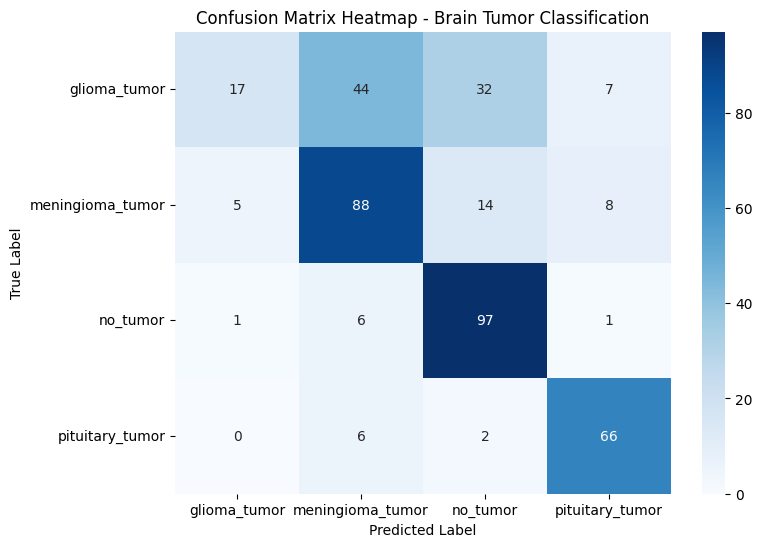

In [21]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_labels,
    yticklabels=class_labels
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap - Brain Tumor Classification")
plt.show()


In [22]:
print(classification_report(
    y_true,
    y_pred,
    target_names=test_generator.class_indices.keys()
))

                  precision    recall  f1-score   support

    glioma_tumor       0.74      0.17      0.28       100
meningioma_tumor       0.61      0.77      0.68       115
        no_tumor       0.67      0.92      0.78       105
 pituitary_tumor       0.80      0.89      0.85        74

        accuracy                           0.68       394
       macro avg       0.71      0.69      0.64       394
    weighted avg       0.70      0.68      0.63       394

